In [ ]:
from google.colab import drive
drive.mount('/content/data')

Mounted at /content/data


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/final_rainfall_sst_drought.csv")

# Define time lags (in months)
lags = {
    'nino3': 4,
    'nino3.4': 3,
    'nino4': 3,
    'Arabian_Sea': 2,
    'equatorialindianocean': 3,
    'bayofbengal': 3
}

# Apply time lags
for col, lag in lags.items():
    df[col] = df[col].shift(lag)

# Optionally: drop rows with NaN values created due to shifting
df = df.dropna().reset_index(drop=True)


# Show preview
print(df.head())

   year  month  Average Rainfall      nino3    nino3.4      nino4  \
0  1901      5          0.049348  26.116969  27.032637  27.911399   
1  1901      6          0.132894  26.431279  27.287510  27.964798   
2  1901      7          3.227804  26.902539  27.620280  28.213469   
3  1901      8          2.522841  27.144844  27.660678  28.473432   
4  1901      9          0.014815  26.593484  27.424999  28.232846   

   Arabian_Sea  equatorialindianocean  bayofbengal     SPI_1  
0    26.879438              27.931744    27.232272 -0.827211  
1    28.441569              28.534986    28.201504 -1.365085  
2    29.247251              29.290119    29.288933  0.269555  
3    28.159310              28.960749    29.527194 -0.008526  
4    26.890903              28.065052    28.754864 -1.924603  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Define lags (in months)
lags = {
    'nino3': 4,
    'nino3.4': 3,
    'nino4': 3,
    'Arabian_Sea': 2,
    'equatorialindianocean': 3,
    'bayofbengal': 3
}

# Apply time lags
for col, lag in lags.items():
    df[col] = df[col].shift(lag)

# Drop rows with NaNs from shifting
df = df.dropna().reset_index(drop=True)

# Define the target column
target_column = 'SPI_1'  # Make sure this is the correct column name

# Features and target split
X = df.drop(columns=[target_column])
y = df[target_column]

# Train-test split (keep time order)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize the XGBoost Regressor
model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


RMSE: 0.0358
R² Score: 0.9605


In [ ]:
def classify_drought(spi_val):
    if spi_val <= -2.0:
        return 'Extreme drought'
    elif -2.0 < spi_val <= -1.5:
        return 'Severe drought'
    elif -1.5 < spi_val <= -1.0:
        return 'Moderate drought'
    elif -1.0 < spi_val < 0:
        return 'Mild drought'
    else:
        return 'No drought'


<Figure size 1000x600 with 0 Axes>

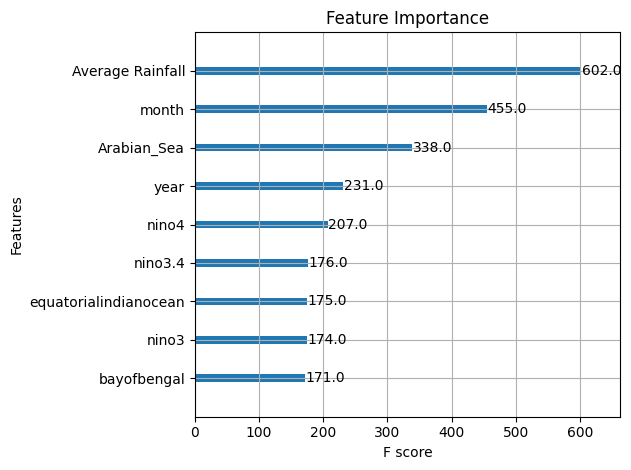

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(model, importance_type='weight', max_num_features=10)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

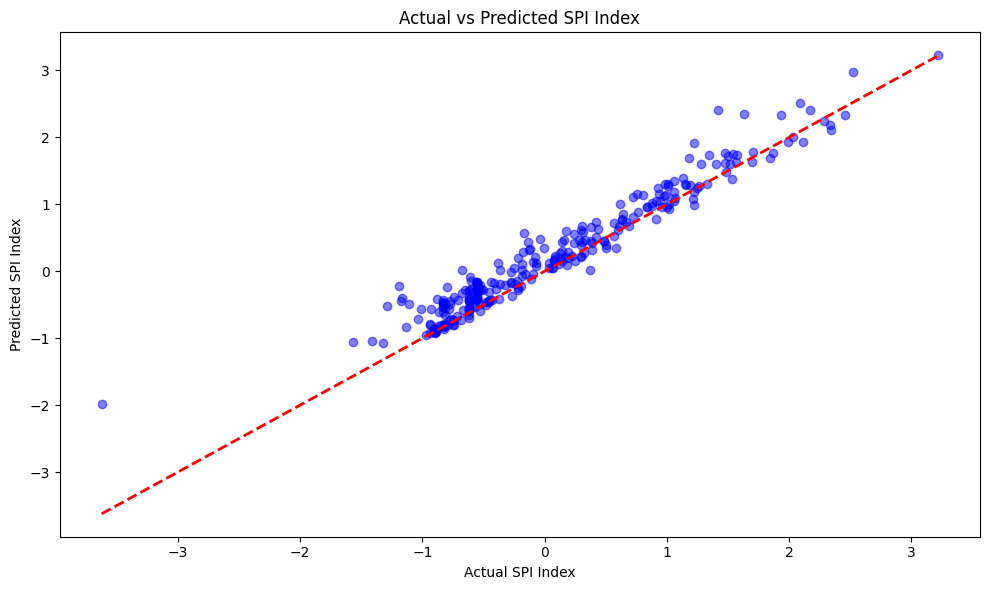

In [ ]:
import matplotlib.pyplot as plt

# Predict on test set
y_pred = model.predict(X_test)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual SPI Index')
plt.ylabel('Predicted SPI Index')
plt.title('Actual vs Predicted SPI Index')
plt.tight_layout()
plt.show()


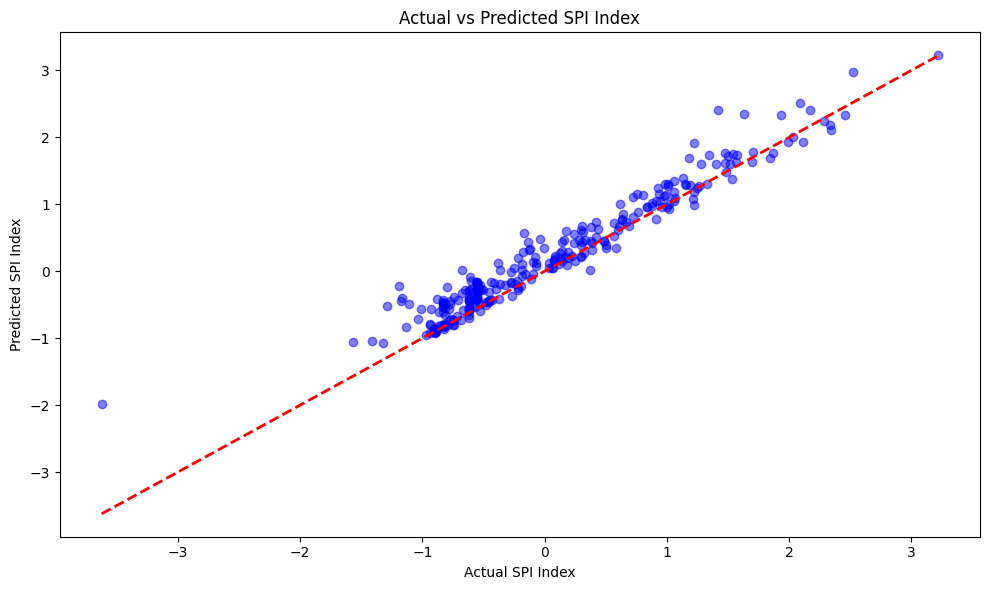

In [ ]:
import matplotlib.pyplot as plt

# Predict on test set
y_pred = model.predict(X_test)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual SPI Index')
plt.ylabel('Predicted SPI Index')
plt.title('Actual vs Predicted SPI Index')
plt.tight_layout()
plt.show()


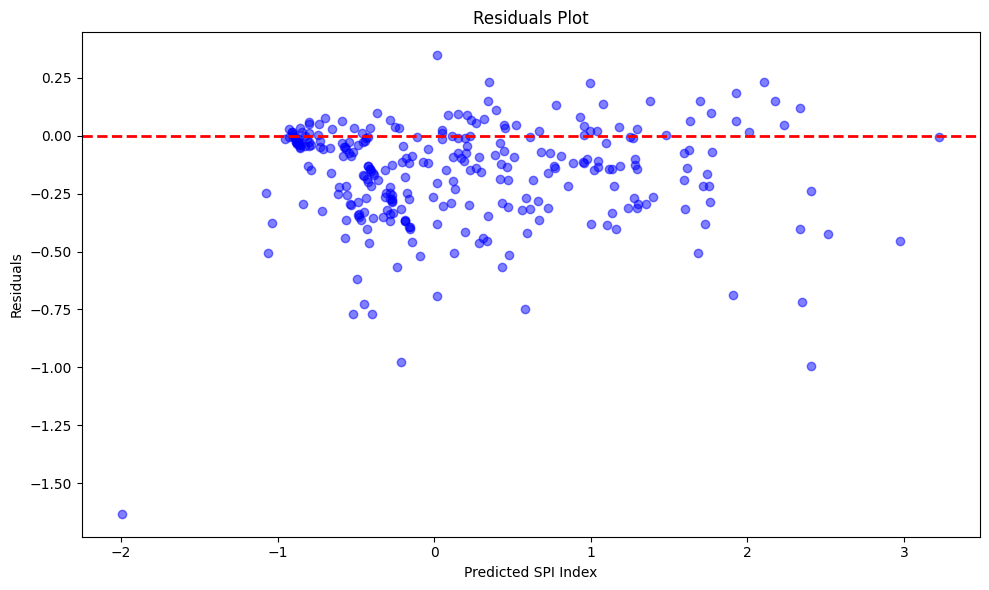

In [ ]:
# Residuals (errors)
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted SPI Index')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Generate a random sample with all expected columns
future_sample = pd.DataFrame({
    'year': [2025],  # or the future year you want
    'month': [5],    # e.g., May
    'Average Rainfall': [np.random.uniform(50, 200)],  # adjust range based on your data
    'nino3': [np.random.uniform(-2, 2)],
    'nino3.4': [np.random.uniform(-2, 2)],
    'nino4': [np.random.uniform(-2, 2)],
    'Arabian_Sea': [np.random.uniform(25, 31)],
    'equatorialindianocean': [np.random.uniform(25, 31)],
    'bayofbengal': [np.random.uniform(25, 31)]
})

# Predict SPI index using trained model
predicted_spi = model.predict(future_sample)[0]

# Classify drought category
def classify_drought(spi_val):
    if spi_val <= -2.0:
        return 'Extreme drought'
    elif -2.0 < spi_val <= -1.5:
        return 'Severe drought'
    elif -1.5 < spi_val <= -1.0:
        return 'Moderate drought'
    elif -1.0 < spi_val < 0:
        return 'Mild drought'
    else:
        return 'No drought'

drought_category = classify_drought(predicted_spi)

# Output
print(f"Predicted SPI Index: {predicted_spi:.3f}")
print(f"Drought Category: {drought_category}")


Predicted SPI Index: 3.112
Drought Category: No drought
